In [90]:
from sklearn import model_selection
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

In [92]:
dataset=pd.read_csv('C:/Users/bagchi/Downloads/Iris.csv')
dataset.drop('Id',axis=1,inplace=True)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


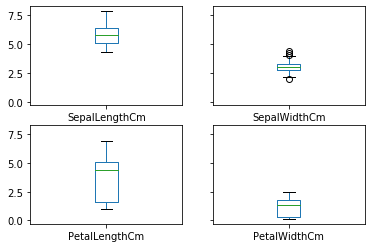

In [93]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=True,sharey=True)
plt.show()

In [94]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


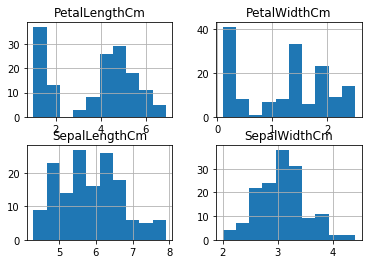

In [96]:
dataset.hist()
plt.show()

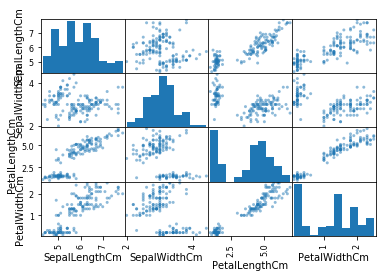

In [97]:
scatter_matrix(dataset)
plt.show()

In [131]:
array=dataset.values
X=array[:,0:4]
y=array[:,4]
validation_size=0.20
seed=6
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=validation_size,shuffle=True,random_state=seed)
scoring='accuracy'

In [134]:
models=[]
#models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [135]:
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(),cv_results.std())

LDA 0.975 0.03818813079129868
KNN 0.9583333333333333 0.04166666666666669
CART 0.9499999999999998 0.04082482904638632
NB 0.9666666666666666 0.04082482904638632
SVM 0.9416666666666667 0.05335936864527374


In [161]:
model=LogisticRegression(max_iter=1000) 
model.fit(X_train,y_train)
pred=model.predict(X_test)
result=accuracy_score(pred,y_test)
print(model.n_iter_)

[88]


In [162]:
kfold=model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)

In [163]:
cv_results.mean()

0.9583333333333333